In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('breast_cancer.csv') # reading Dataset
ypro = ProfileReport(df)
ypro.to_file('breast_cancer.html')
label = df['Class']     #Table of labels only
label
df2 = df
df = df.drop(['Class'], axis=1)
print('The shape of Data Frame (only features) is:\t',df.shape)
df.head()
#label.values
#print(len(df))   #Number of indices (Data) 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The shape of Data Frame (only features) is:	 (683, 9)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


## Section A

### Demonstrating data don't contain outliers or NaNs  

In [17]:
print(f"Number of missing values in each column of data:")
print(df.isna().sum())    # This function denotes there is no missing value in our dataset ...
           #(the related quantity for each feature is zero)
print(f"Statistical data of the features which demonstrate lack of outliers:")
print(df.describe()) # The function denotes mean value, min vale and maximum value of data...
               #...which demonstrate no outliers (all teh the values are near the mean value)

Number of missing values in each column of data:
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64
Statistical data of the features which demonstrate lack of outliers:
       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count       683.000000               683.000000                683.000000   
mean          4.442167                 3.150805                  3.215227   
std           2.820761                 3.065145                  2.988581   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000           

### Detecting & demonstrating outliers

In [18]:
import numpy as np

In [19]:
features = ["Clump Thickness","Uniformity of Cell Size" \
            ,"Uniformity of Cell Shape", \
            "Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei" \
            ,"Bland Chromatin","Normal Nucleoli","Mitoses"]

outliers=[]

def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

for i in range(df.shape[1]):
    #df['product'].values.tolist()
    detect_outlier(df.iloc[:,i])
    #print(f"Outlier values for feature /{features[i]}/: {outliers}")
    print(f" Number of Outliers for feature ({features[i]}): {len(outliers)}")


 Number of Outliers for feature (Clump Thickness): 0
 Number of Outliers for feature (Uniformity of Cell Size): 0
 Number of Outliers for feature (Uniformity of Cell Shape): 0
 Number of Outliers for feature (Marginal Adhesion): 0
 Number of Outliers for feature (Single Epithelial Cell Size): 31
 Number of Outliers for feature (Bare Nuclei): 31
 Number of Outliers for feature (Bland Chromatin): 31
 Number of Outliers for feature (Normal Nucleoli): 31
 Number of Outliers for feature (Mitoses): 62


### Altering the labels

In [20]:
for i in range(len(label)):  #This loop alters label == 2 -> 0 and label == 4 -> 1
    if label[i] == 2:
        label[i] = 0
    elif label[i] == 4:
        label[i] = 1
#print(label.unique())   #Unique values of the Class column
#print(label.nunique())  #Number of unique the Class column

## Section B

### Plotting the distribution of data

In [21]:
import seaborn as sns

The distribution of data for each feature is as follow:


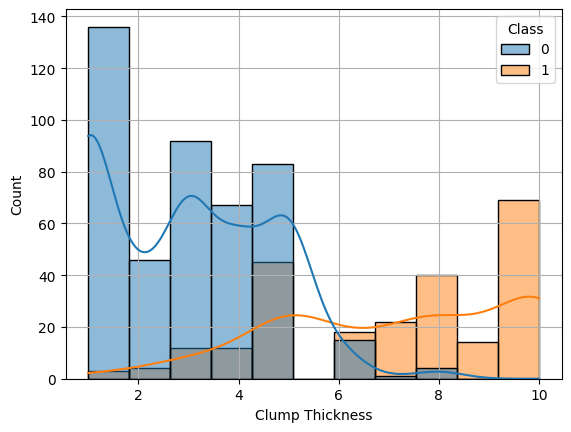

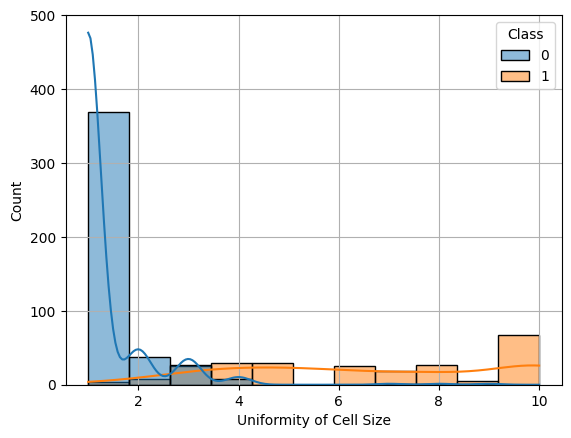

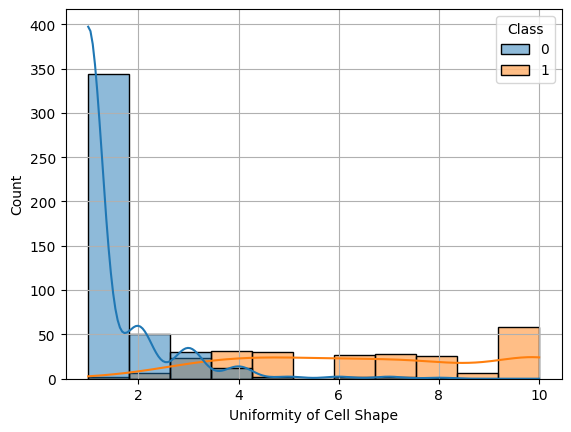

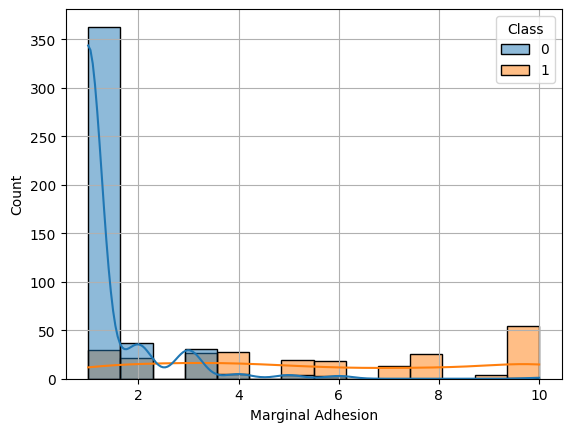

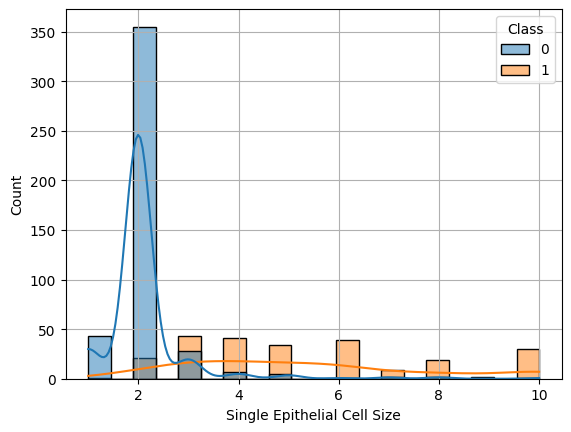

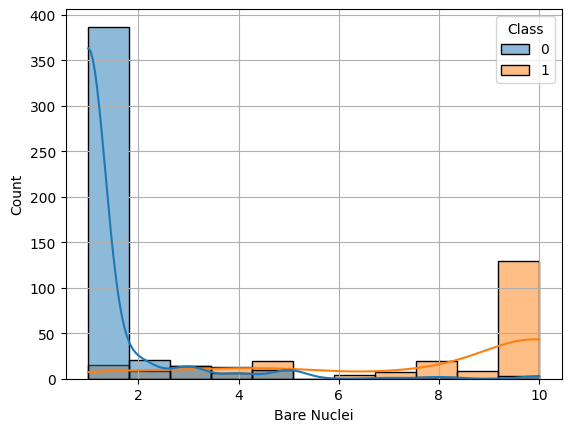

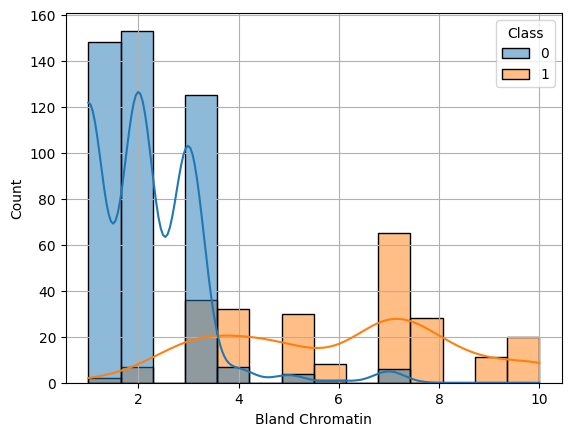

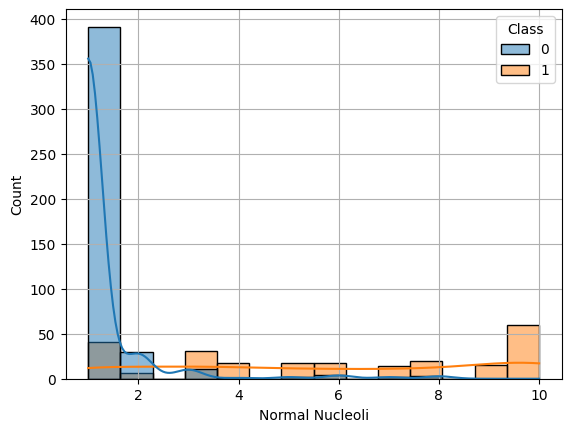

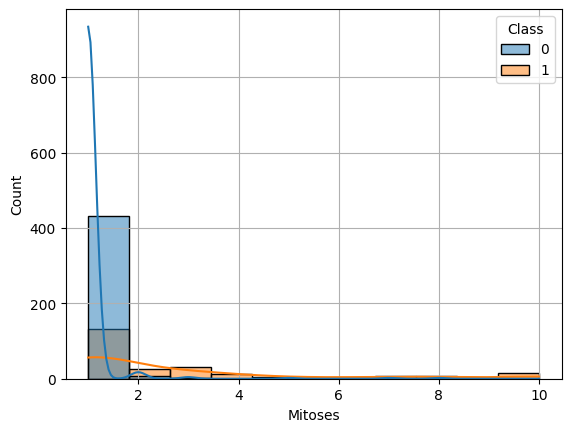

In [22]:
print("The distribution of data for each feature is as follow:")

for i in range(len(features)):
    sns.histplot(data = df2,x = features[i] ,hue = "Class" , kde = True,cbar = True)
    plt.savefig('Q1_distribution of features\Q1 - distribution of feature '+ str(features[i]) +' for each class.png')
    plt.grid()
    plt.show()

## Section C

### Correlation visualisation

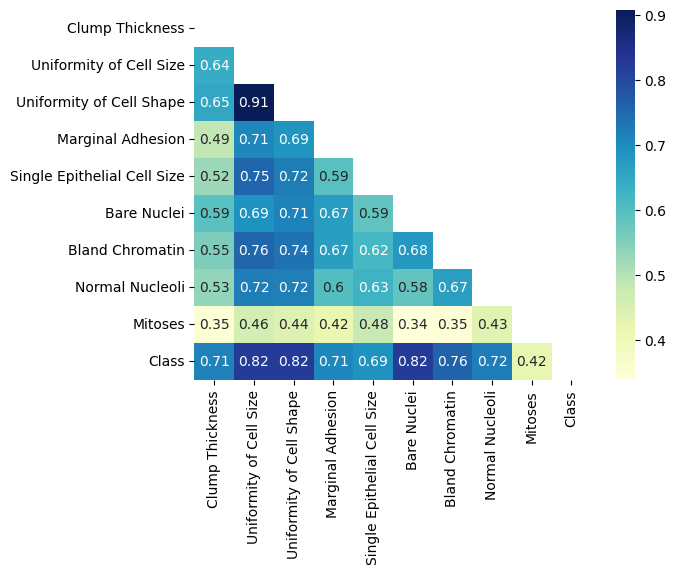

In [23]:
mask = np.triu(np.ones_like(df2.corr()))
sns.heatmap(df2.corr(),annot=True, linecolor='blue',cmap="YlGnBu" , mask = mask)
plt.savefig('Q1 - Heat map of correlations between features.png')
plt.show()

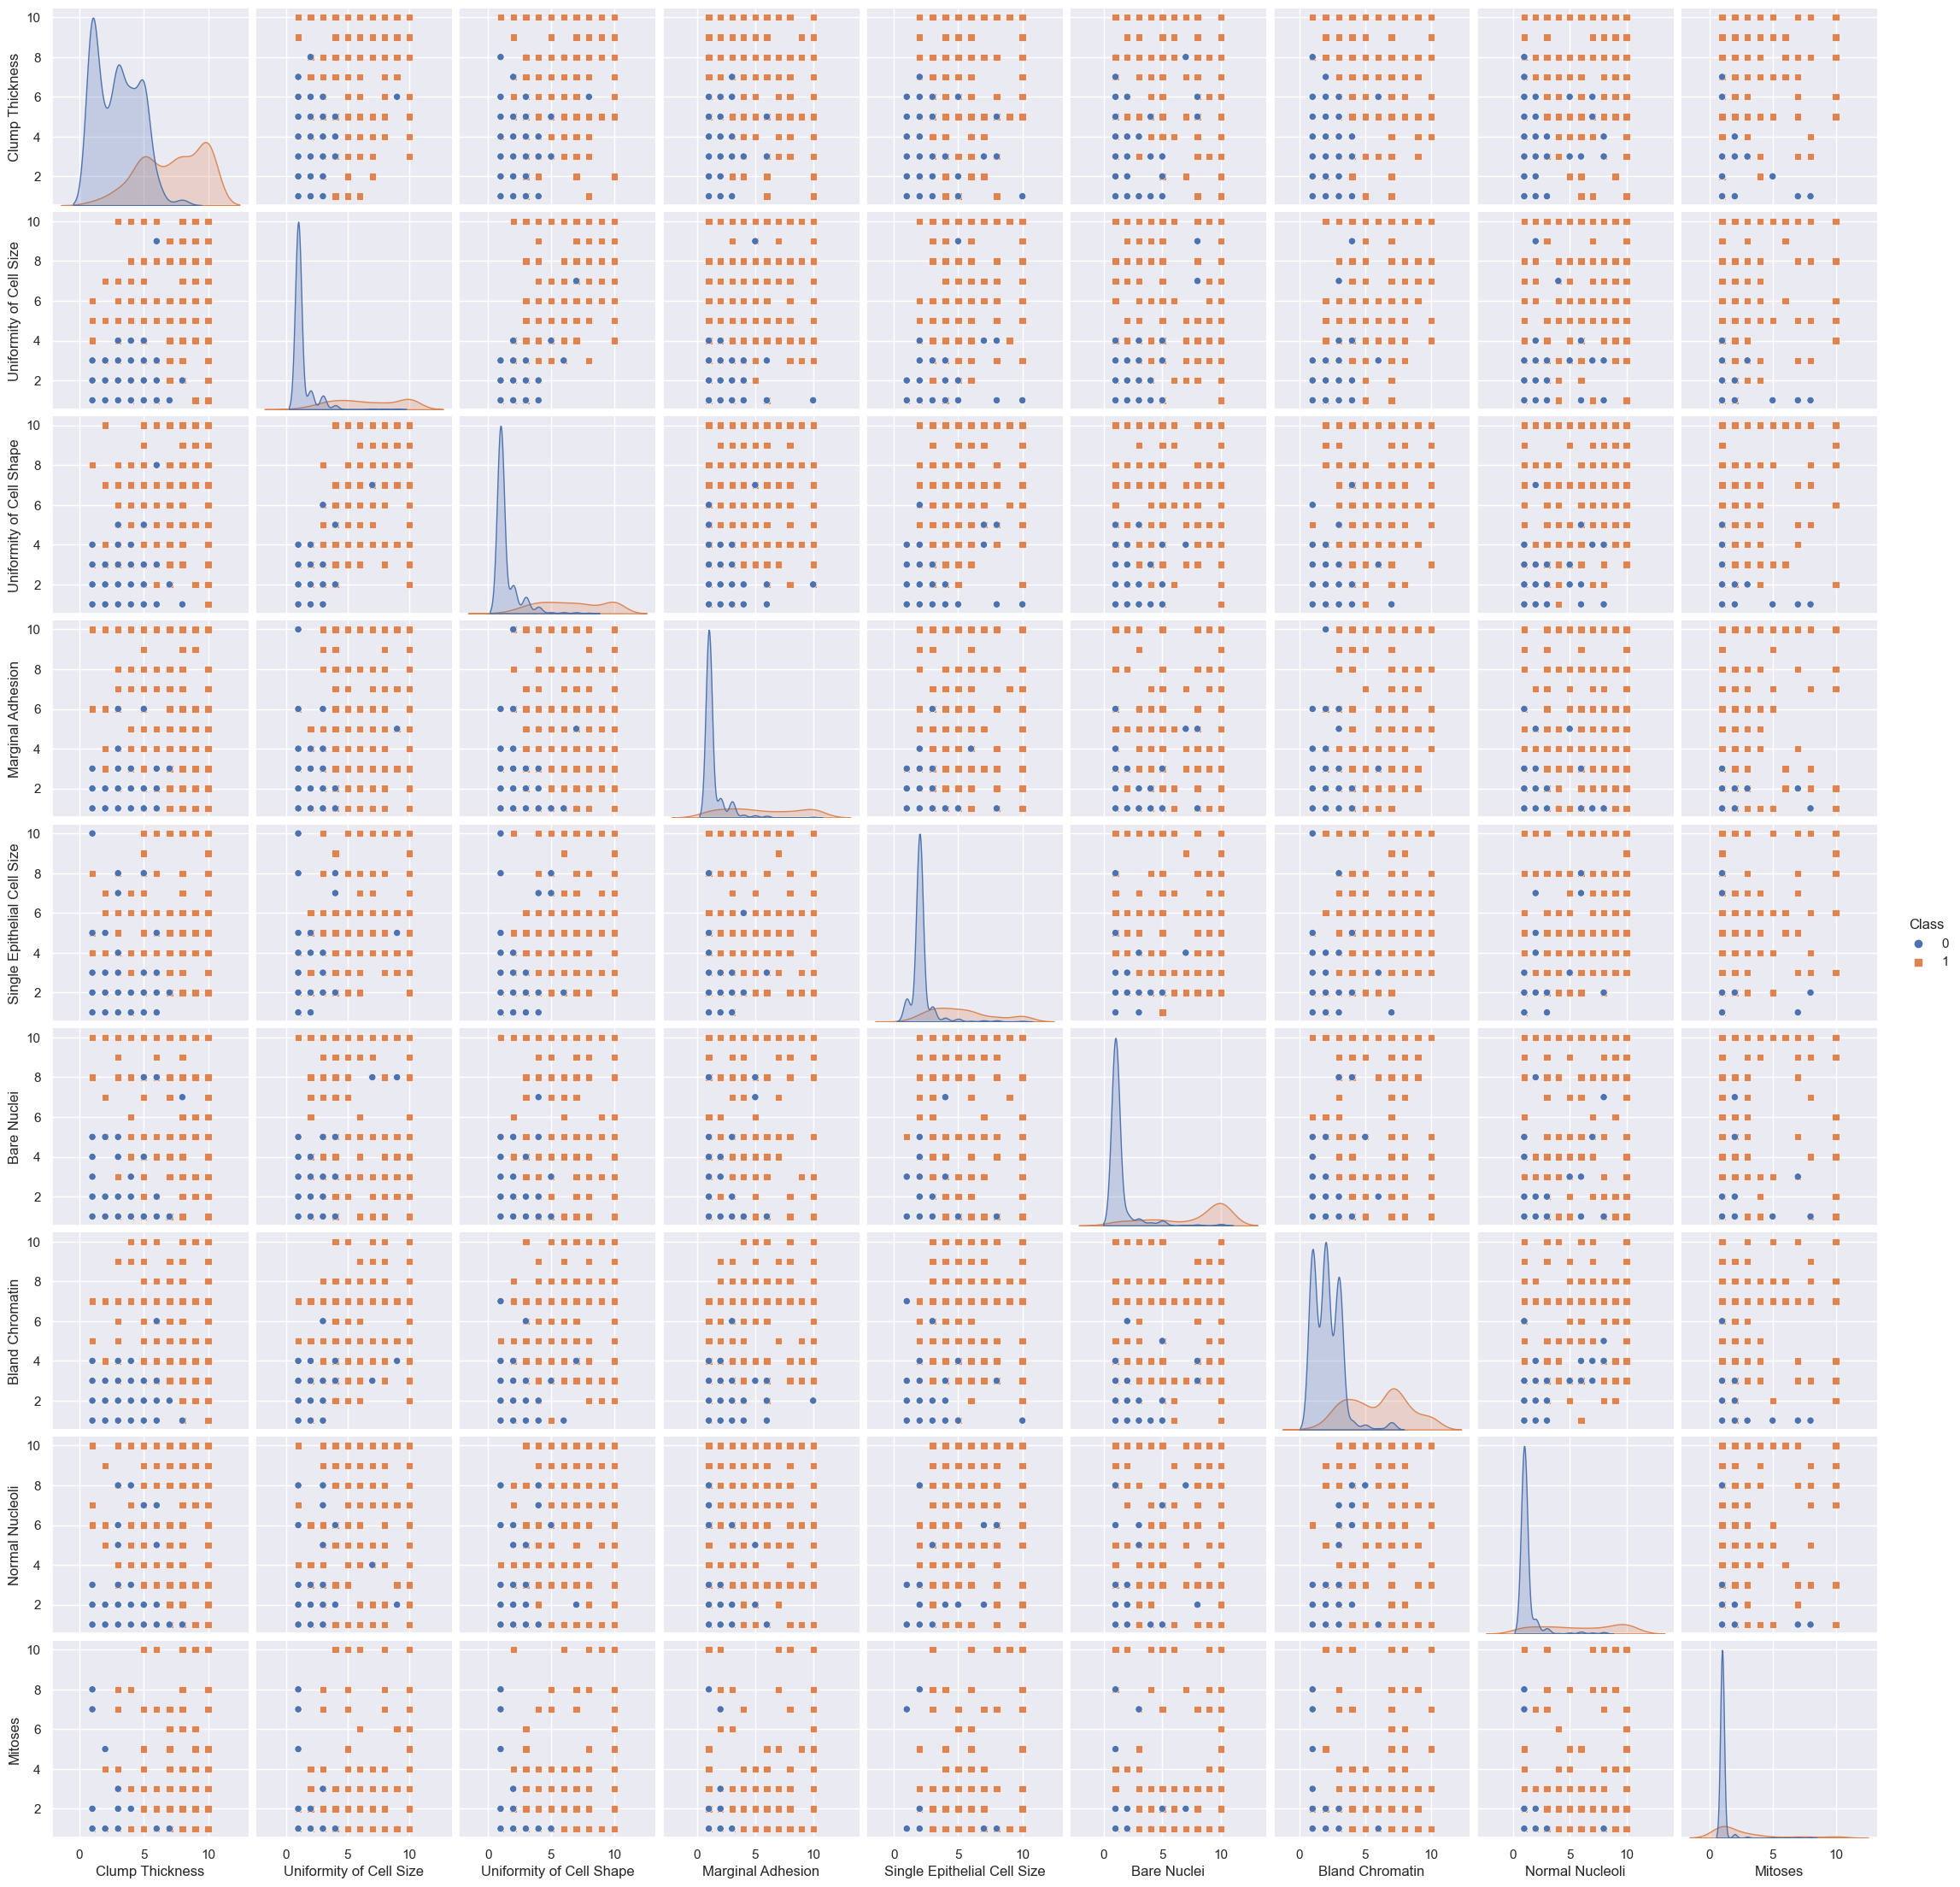

In [28]:
sns.set()
sns.color_palette("rocket")
sns_plot = sns.pairplot(df2,hue = 'Class',markers=["o", "s"]) #Pair plot of different features
plt.savefig('Q1 - Pair-plot of features.png')
plt.show()

## Logistic Regression Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score , precision_score , recall_score

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df,\
               label, test_size=0.1, random_state=1)
cv=KFold(n_splits=5,random_state = None , shuffle = False)
lr = LogisticRegressionCV(cv=cv,scoring = 'recall' )
score = cross_val_score(lr,X_train,y_train,cv=cv)
print(f"Cross Validation Scores are {score}")
print(f"Average Cross Validation score :{score.mean()}")


Cross Validation Scores are [0.95348837 0.95121951 0.89361702 0.95652174 1.        ]
Average Cross Validation score :0.9509693289390351


In [32]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
cv_results = cross_validate(lr, X_train, y_train, cv=cv)
cv_results

{'fit_time': array([0.20486093, 0.18778968, 0.18427968, 0.18726611, 0.1892252 ]),
 'score_time': array([0.00499749, 0.        , 0.00499249, 0.00499749, 0.002141  ]),
 'test_score': array([0.95348837, 0.95121951, 0.89361702, 0.95652174, 1.        ])}

In [33]:
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

pred_modify = cross_val_predict(lr,X_train,y_train,cv = cv)
print(preds)
#pred_modify == y_train

[0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0
 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1]


In [35]:
print(f"Precision score is determined: {precision_score(y_test,preds)}") 
#print(f"Precision score after cv: {precision_score(y_test,pred_modify)}") 
print(f"recall score is determined: {recall_score(y_test , preds)}")

Precision score is determined: 1.0
recall score is determined: 0.9230769230769231


## Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion matrix arrays are:
[[43  0]
 [ 2 24]]
Also, it can be visualized through this plot:


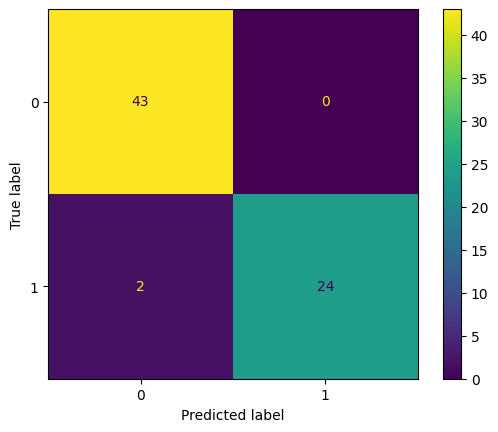

In [37]:
cm = confusion_matrix(y_test, preds, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
print("confusion matrix arrays are:")
print(confusion_matrix(y_test,preds))
print("Also, it can be visualized through this plot:")
disp.plot()
plt.savefig('Q1 - confusion matrix.png')
plt.show()
